#GEELY AUTO

Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
<br>

They have to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.

The company wants to know:
<br>
1. Which variables are significant in predicting the price of a car ? <br>
2. How well those variables descrie the price of a car ? <br> 


##Data Import 

Importing the libraries and data required to build the model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import sklearn
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path = 'drive/My Drive/Masters/CarPrice.csv'
df = pd.read_csv(path)

##Data Cleaning

Examining the data imported

In [3]:
df.shape

(205, 26)

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

The data seems to have no null values.Retaining the data set as is.<br>
Getting car company name and car name.

Spliting the carname column to derive - name of the car and model of the model .

In [6]:
df['Car_Company'] = df['CarName'].str.split(" ", n = 1, expand = True)[0].str.lower()
#df['Car_Model'] = df['CarName'].str.split(" ", n = 1, expand = True)[1].str.lower()
df.drop(['CarName','car_ID'] ,axis =1 ,inplace = True )

Ignoring car model and cleaning car company column

In [7]:
df.Car_Company.value_counts()

toyota         31
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
vw              2
maxda           2
toyouta         1
mercury         1
porcshce        1
vokswagen       1
Name: Car_Company, dtype: int64

Some features have corrupt or redundant values.Fixing those values

In [8]:
df['Car_Company'] = df.Car_Company.str.replace('vokswagen' , 'volkswagen')
df['Car_Company'] = df.Car_Company.str.replace('vw' , 'volkswagen')
df['Car_Company'] = df.Car_Company.str.replace('porcshce' , 'porsche')    
df['Car_Company'] = df.Car_Company.str.replace('toyouta' , 'toyota')
df['Car_Company'] = df.Car_Company.str.replace('maxda' , 'mazda')  

In [9]:
df.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [10]:
df['drivewheel'] = df.drivewheel.str.replace('4wd','fwd')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

Checking all the categorical columns and checking if any anomalies exist.

In [12]:
categorical= [  'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation',  'enginetype', 'cylindernumber',  
       'fuelsystem']
df_cat = df[categorical]
df_cat.apply(lambda c : c.value_counts())

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
1bbl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
2bbl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0
4bbl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
convertible,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
diesel,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dohc,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN
dohcv,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
eight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
five,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN
four,NaN,NaN,115.0,NaN,NaN,NaN,NaN,159.0,NaN


##Analyzing & Understanding the data 

Lets start by examining distribution of all the columns for better understanding

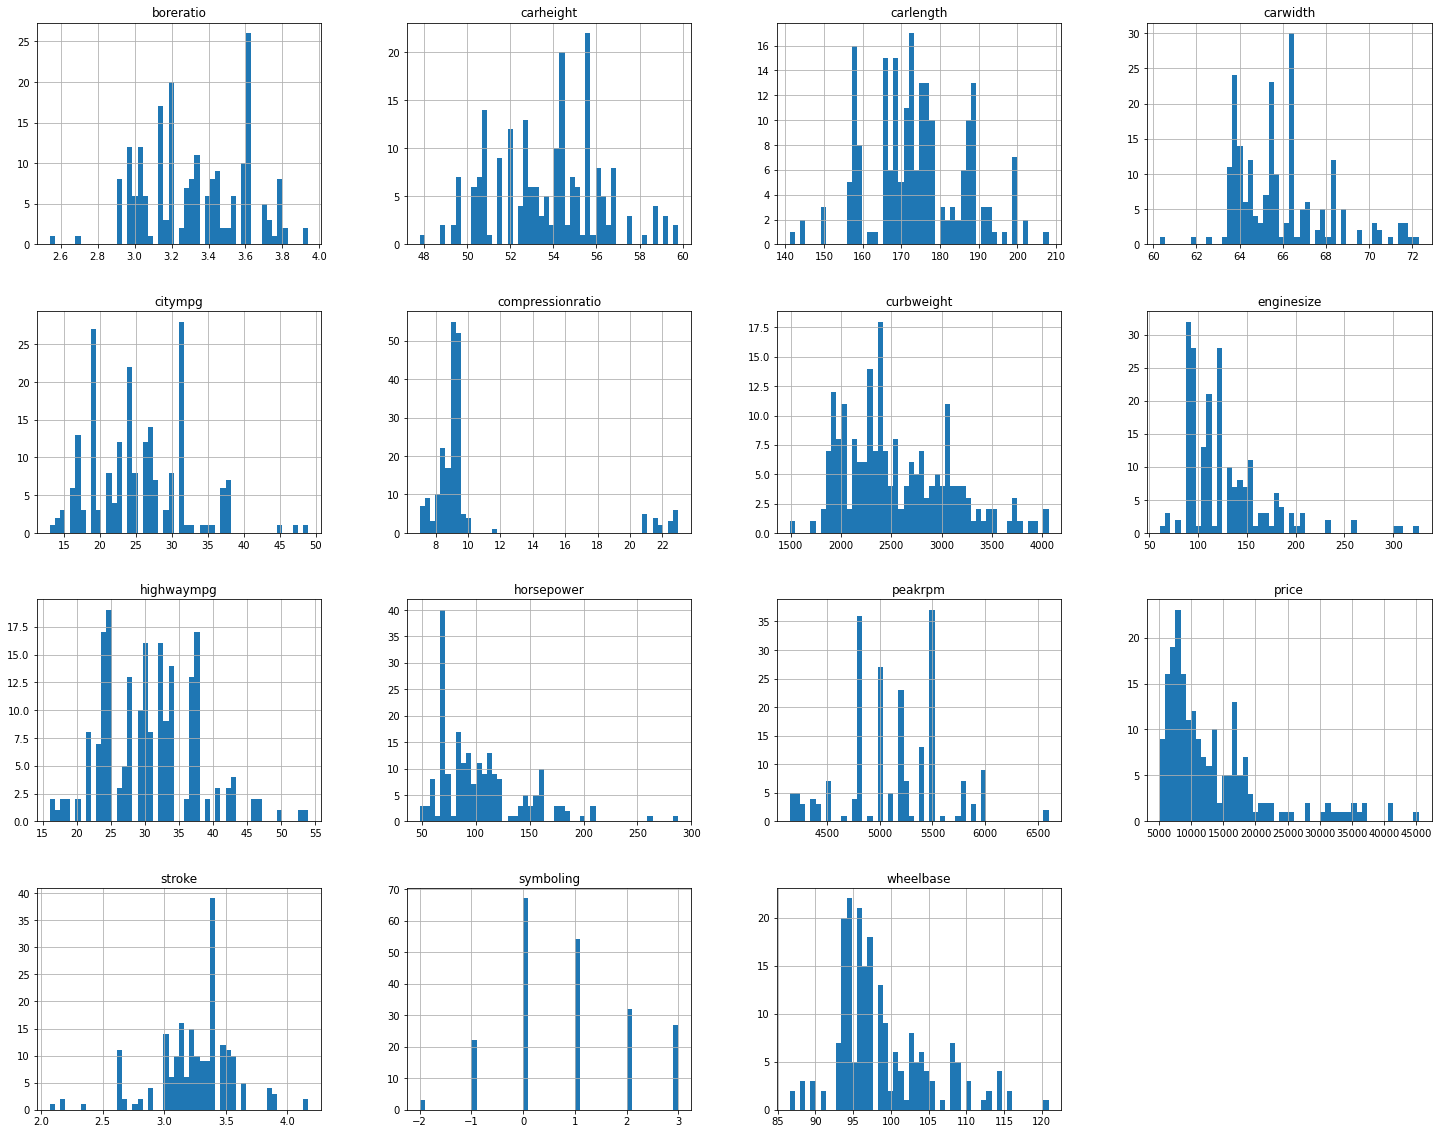

In [13]:
%matplotlib inline
df.hist(bins=50, figsize=(25,20))
plt.show()

Lets examine and understand all the numerical columns

###Understanding Numerical columns

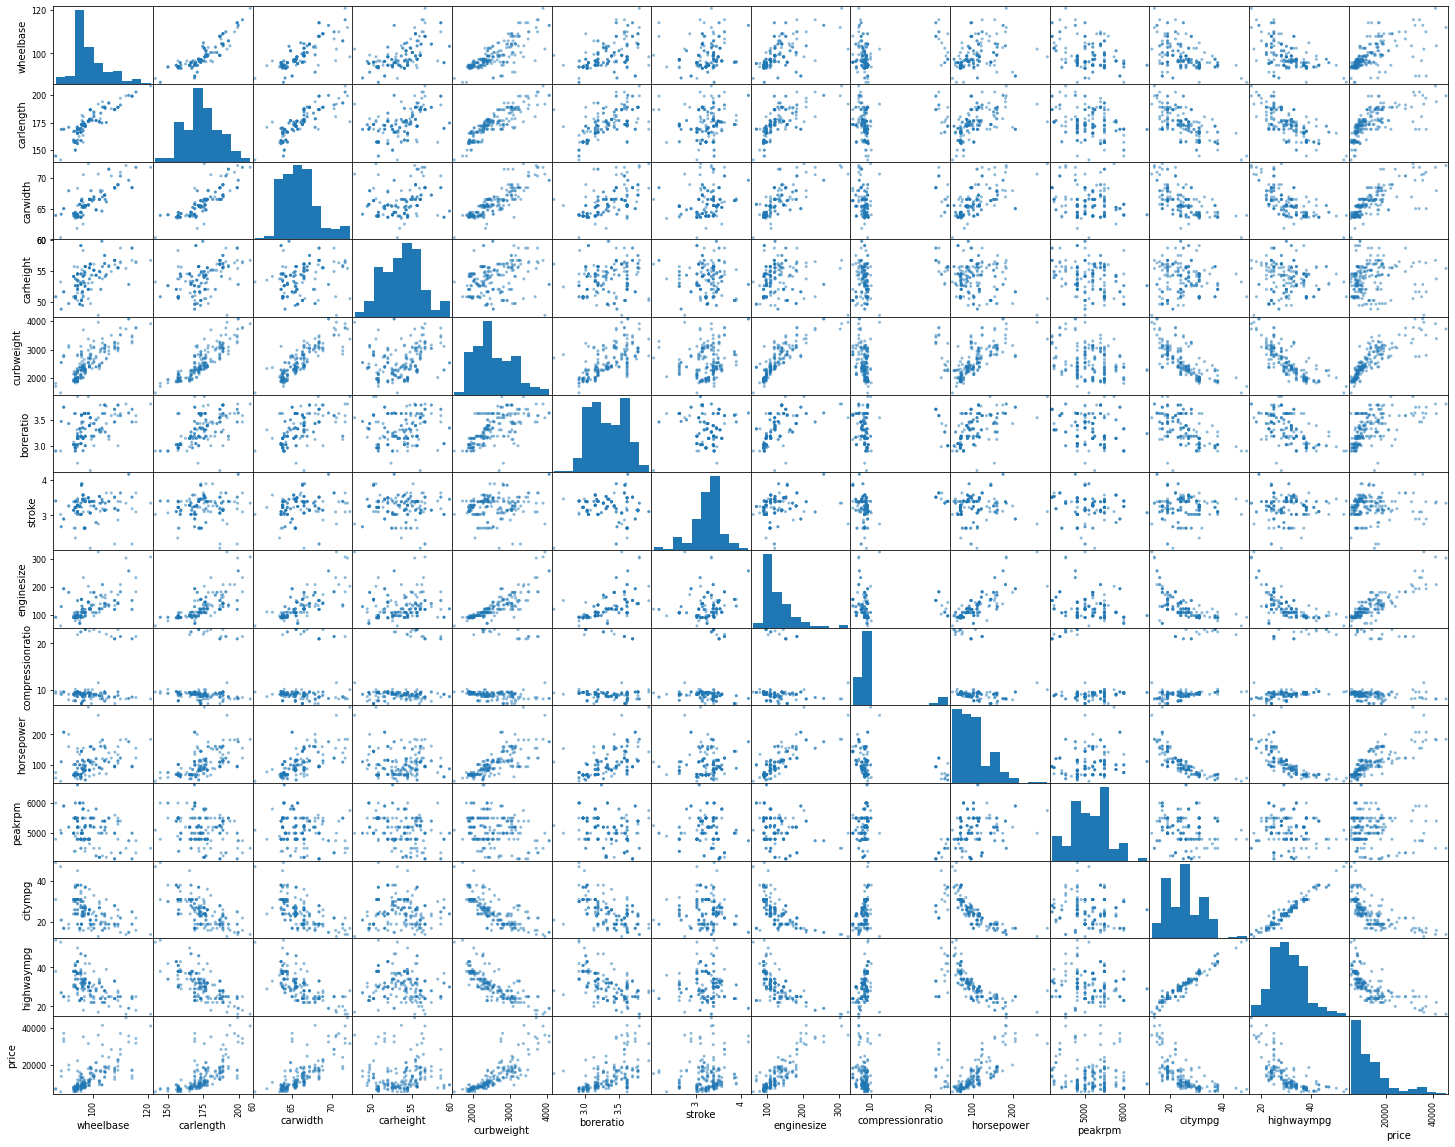

In [14]:
from pandas.plotting import scatter_matrix

num_cols = ['wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight','boreratio', 'stroke','enginesize', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price']
scatter_matrix(df[num_cols], figsize=(25, 20))
plt.show()

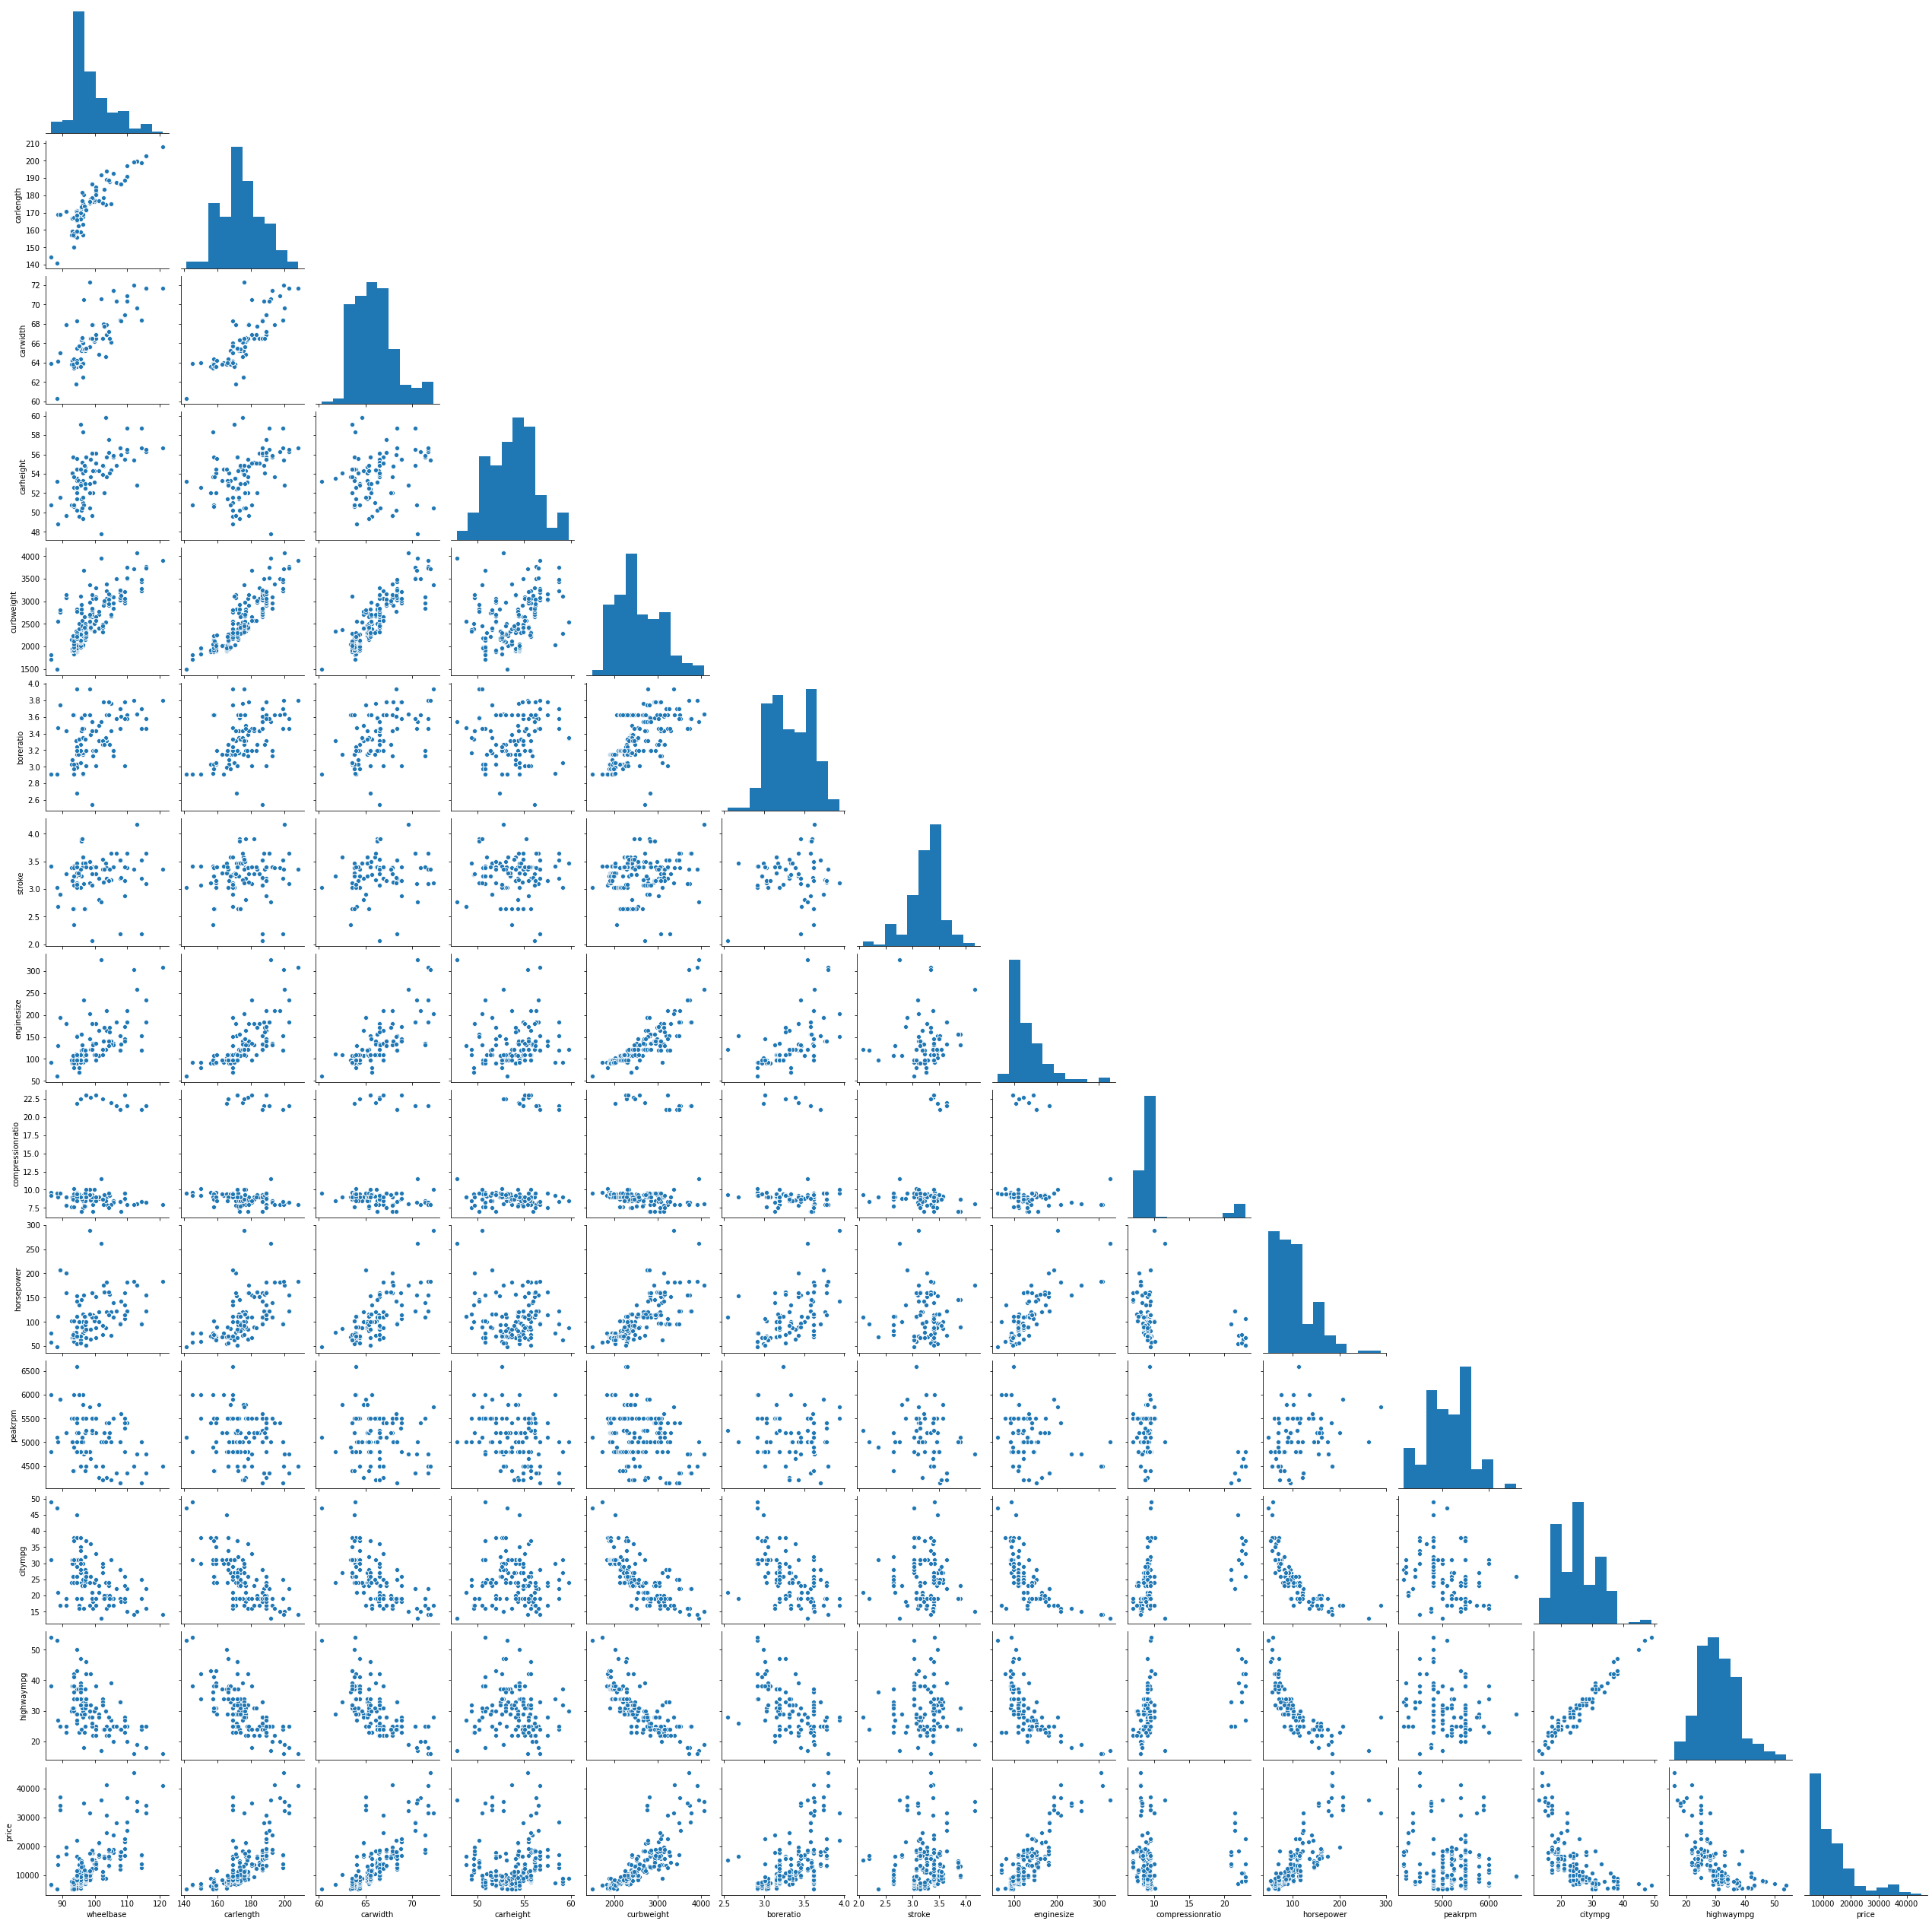

In [15]:
#fig, ax = plt.subplots(figsize = (12,9))
sns.pairplot(df[num_cols],corner=True )
plt.show()

As per the charts above <br>
Price is possitively impacted by  carlength |car width | curbweight | engine size | horsepower <br>
Price is negetively impacted by citympg | highwaympg

###Categorical columns Analysis

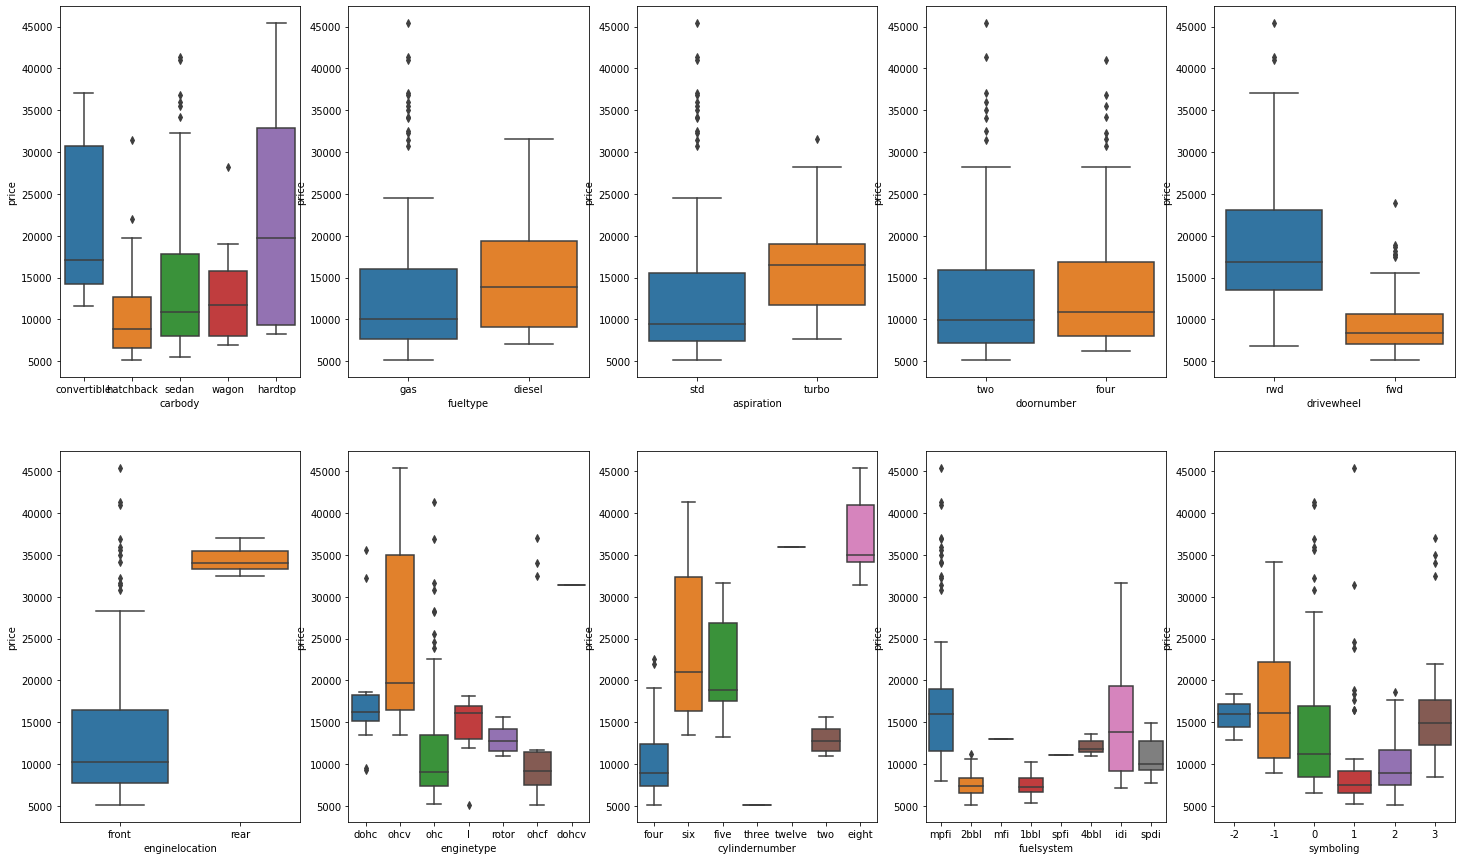

In [16]:
plt.figure(figsize=(25, 15))
plt.subplot(2,5,1)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(2,5,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(2,5,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(2,5,4)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(2,5,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(2,5,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(2,5,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(2,5,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(2,5,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.subplot(2,5,10)
sns.boxplot(x = 'symboling', y = 'price', data = df)
plt.show()

From the charts we can deduce that -<br>
-engine,cylinder number , fuel system , engine location ,drive wheel ,symboling ,aspiration , fuel type & car body type influences price
<br>
-door number doesnt influence price as much as other variables.

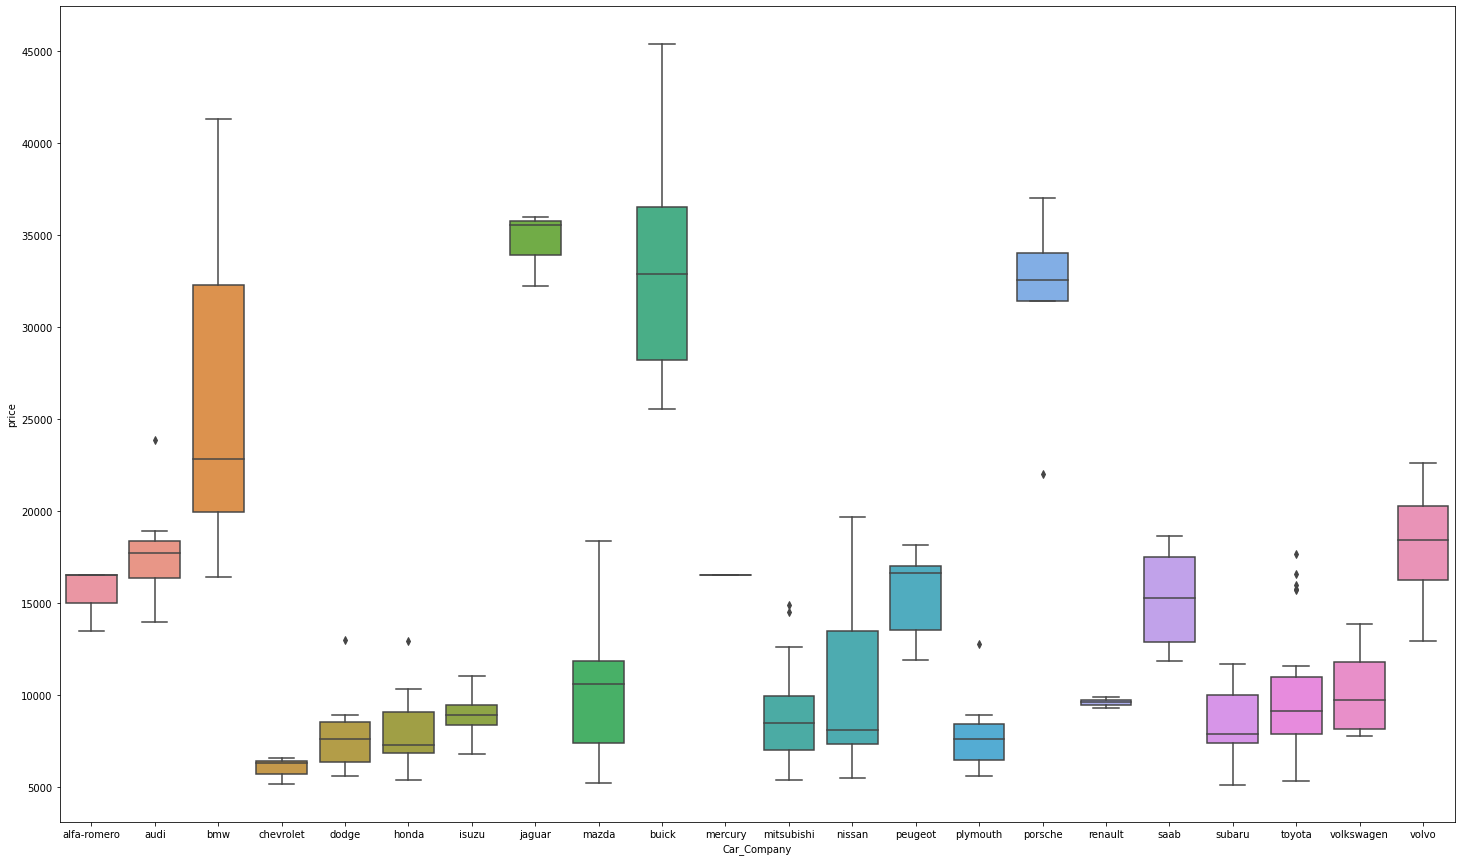

In [17]:
plt.figure(figsize=(25, 15))
sns.boxplot(x = 'Car_Company', y = 'price', data = df)
plt.show()

Some luxury car companies have cars that are priced higher compared to car companies that have lower/medium price segments. The data has a distiction of luxury/utility segements.we can confirm if they add any value to model and get rid of them/keep them.

###Finding Correlations

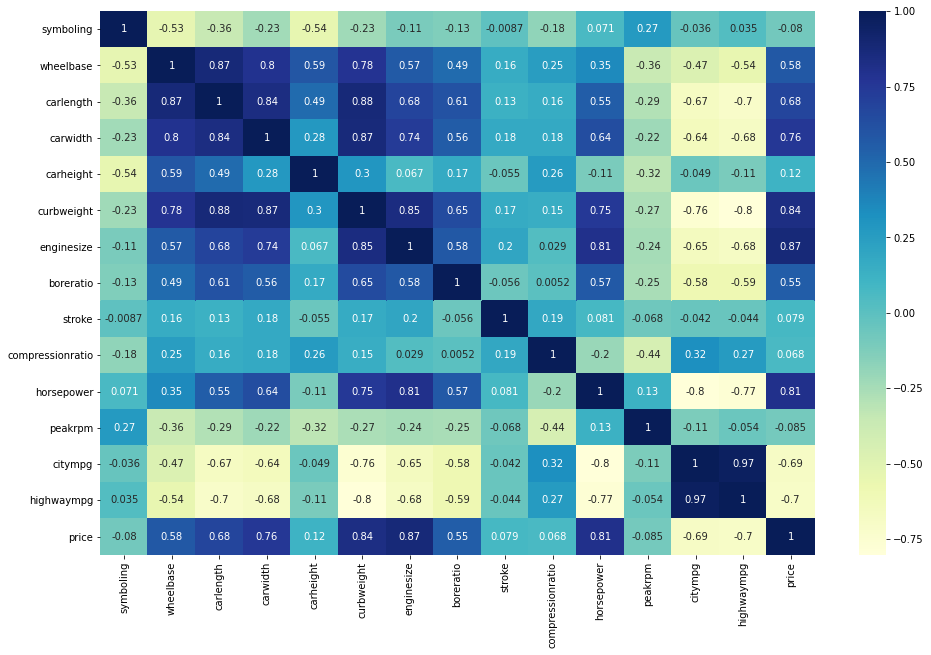

In [18]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

Symboling , car height ,compression ratio & peak rpm seems to have very low correlation with price of the cars. we can confirm if they add any value to model and get rid of them.

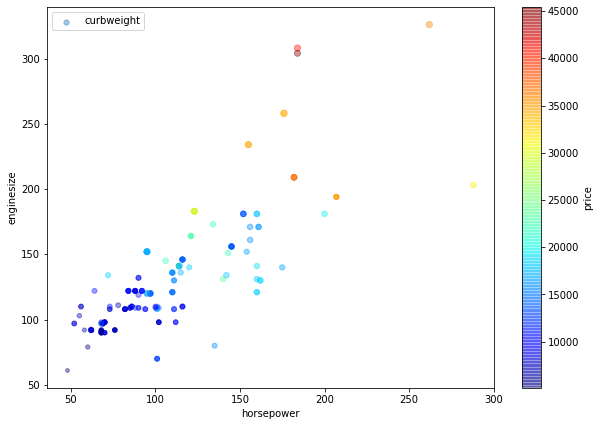

In [19]:
df.plot(kind="scatter", x="horsepower", y="enginesize", alpha=0.4,
    s=df["curbweight"]/100, label="curbweight", figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

##Handling text and categorical values

In [20]:
cols = [ 'aspiration', 'drivewheel' , 'fueltype' ,'carbody','symboling','cylindernumber','enginelocation','symboling','doornumber','enginetype','fuelsystem' ,'Car_Company']
vars = pd.get_dummies(df[cols], drop_first = True)
df = pd.concat([df , vars],axis =1)
df.drop(labels=cols ,axis =1 ,inplace = True )
#df.drop(labels='Car_Company' ,axis =1 ,inplace = True )

In [21]:
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,aspiration_turbo,drivewheel_rwd,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,enginelocation_rear,doornumber_two,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,Car_Company_audi,Car_Company_bmw,Car_Company_buick,Car_Company_chevrolet,Car_Company_dodge,Car_Company_honda,Car_Company_isuzu,Car_Company_jaguar,Car_Company_mazda,Car_Company_mercury,Car_Company_mitsubishi,Car_Company_nissan,Car_Company_peugeot,Car_Company_plymouth,Car_Company_porsche,Car_Company_renault,Car_Company_saab,Car_Company_subaru,Car_Company_toyota,Car_Company_volkswagen,Car_Company_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##Spliting the train and test data

A stratified spliting is used. This will help us proportionately distribute the data to testing and training set ( based on price of car)

In [22]:
#df_train, df_test = train_test_split(df , train_size = 0.7,random_state = 100)
df['price_cat'] = pd.qcut(df["price"], 4) 

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=100)

for train_index, test_index in split.split(df, df["price_cat"]):
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]


def proportions(data):
  return data["price_cat"].value_counts() / len(data)

props = pd.DataFrame({
    "Total dataset": proportions(df),
    "Train set": proportions(df_train),
    "Test set": proportions(df_test)})


for data in (df_train, df_test):
    data.drop("price_cat", axis=1, inplace=True)


print('length of train set is {} ,test set is {} and % of test is {}'.format(len(df_train),len(df_test),round(len(df_test)*100/len(df) ,2)))
print('proportion comparision\n' , props)

length of train set is 143 ,test set is 62 and % of test is 30.24
proportion comparision
                     Total dataset  Train set  Test set
(5117.999, 7788.0]       0.253659   0.251748  0.258065
(7788.0, 10295.0]        0.248780   0.244755  0.258065
(10295.0, 16503.0]       0.248780   0.251748  0.241935
(16503.0, 45400.0]       0.248780   0.251748  0.241935


In [23]:
df_train[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg','price']].describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,98.346154,173.898601,65.858741,53.559441,2546.398601,126.146853,3.331888,3.248881,10.007692,105.629371,5184.615385,25.104895,30.832168,13464.350818
std,5.568116,11.652552,2.055577,2.450158,508.778766,40.787142,0.268934,0.327658,3.786839,41.652262,462.587288,6.765398,7.102852,7995.016865
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,17.000000,5118.000000
25%,94.500000,167.050000,64.200000,51.600000,2190.500000,97.500000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7841.500000
50%,96.900000,173.200000,65.500000,53.900000,2414.000000,110.000000,3.310000,3.290000,9.000000,97.000000,5200.000000,24.000000,30.000000,10345.000000
75%,101.200000,180.250000,66.750000,55.500000,2916.500000,141.000000,3.585000,3.400000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,115.600000,202.600000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,41315.000000


##Feature Scaling

Scaling the values to a range of 0 to 1 by using MinMax Function

In [24]:
scaler = MinMaxScaler()

num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [25]:
df_train[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg','price']].describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.405040,0.533311,0.463228,0.479953,0.410550,0.245837,0.565634,0.561372,0.187981,0.240122,0.422292,0.336247,0.373842,0.230581
std,0.192004,0.189472,0.171298,0.204180,0.197354,0.153914,0.192095,0.156028,0.236677,0.173551,0.188811,0.187928,0.191969,0.220875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.421951,0.325000,0.316667,0.272498,0.137736,0.435714,0.495238,0.100000,0.091667,0.265306,0.166667,0.216216,0.075241
50%,0.355172,0.521951,0.433333,0.508333,0.359193,0.184906,0.550000,0.580952,0.125000,0.204167,0.428571,0.305556,0.351351,0.144404
75%,0.503448,0.636585,0.537500,0.641667,0.554112,0.301887,0.746429,0.633333,0.150000,0.283333,0.551020,0.472222,0.486486,0.314695
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Building The Model

In [26]:
#dividing pridictor features and label/target feature
y_train = df_train.pop('price')
X_train = df_train


We will build 3 models, using:

1. Manual model building method.
2. Automated feature selection
3. Hybrid ( manual + automated feature selection)

I will first start by modeling manually(top down) , then use an automated method to build the model.Then we shall combine our findings from manual model building and automated model to come up with  a **final HYBRID Model** .

The following steps are followed : 

1. Build and fit the model
2. Residual analysis
3. VIF check 
4. Test the model on testing set


###Train and fit the model

In [27]:
#Building a model on all the training features
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train ,X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     48.66
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           6.12e-47
Time:                        09:43:04   Log-Likelihood:                 262.86
No. Observations:                 143   AIC:                            -411.7
Df Residuals:                      86   BIC:                            -242.8
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

Lets manually get rid of few features that have low significance and columns that have low correlation with price.


In [28]:
cols = [   'carwidth',   'curbweight','enginesize', 'boreratio', 'stroke',  
         'aspiration_turbo',   
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'enginelocation_rear',  'enginetype_l',  
       'enginetype_rotor',    'Car_Company_bmw',  
       'Car_Company_mitsubishi', 'Car_Company_peugeot', 'Car_Company_porsche' ]
X_train_lr = X_train[cols]
X_train_sm = sm.add_constant(X_train_lr)
lr = sm.OLS(y_train ,X_train_sm).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     112.2
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           2.16e-66
Time:                        09:43:04   Log-Likelihood:                 208.34
No. Observations:                 143   AIC:                            -382.7
Df Residuals:                     126   BIC:                            -332.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

Retaining the columns of significance and higher correlation based on our EDA earlier and the p values from model above

The model has a good R2 score ~91% ,which means the model can explain good amount of variance in the data .Most of the features also have low P value , an indicator for good significance.

###Checking VIF( Variance inflation factor)

In [29]:
             # Create a dataframe that will contain the names of all the feature variables and their respective VIFs 
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,cylindernumber_three,inf
11,cylindernumber_two,inf
17,Car_Company_peugeot,inf
14,enginetype_rotor,inf
13,enginetype_l,inf
0,const,74.59
3,enginesize,21.92
2,curbweight,11.28
8,cylindernumber_four,9.21
1,carwidth,5.21


Removing features one by one , and reruning the model to get model with features that have lower vif (<5) and  with low P Value

In [30]:
cols =['carwidth',    'boreratio','cylindernumber_five', 'cylindernumber_four',  'cylindernumber_twelve',  
       'enginelocation_rear',  'enginetype_rotor',    'Car_Company_bmw' ]

  
X_train_vif = X_train[cols]
X_train_vif_sm = sm.add_constant(X_train_vif)
lr_reg = sm.OLS(y_train ,X_train_vif_sm).fit()
print(lr_reg.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     106.6
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           2.81e-54
Time:                        09:43:05   Log-Likelihood:                 156.32
No. Observations:                 143   AIC:                            -294.6
Df Residuals:                     134   BIC:                            -268.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.02

###Residual Analysis

Lets analyize the residuals and check if any patterns can be detected or if the residuals follow our assumptions.

In [31]:
y_train_pred = lr_reg.predict(X_train_vif_sm)

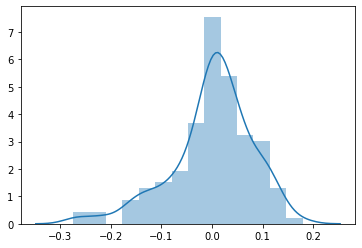

In [32]:
res = y_train_pred - y_train
sns.distplot(res )

The residuals are normally distributed as per our assumptions.

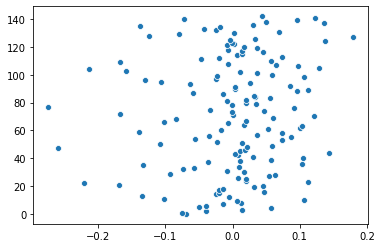

In [33]:
k = [i for i in range(143)]
sns.scatterplot(res,k)

No Patterns can be seen in the residuals

###Testing the model on test set

In [34]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [35]:
X_test_rfe = df_test[['carwidth',    'boreratio','cylindernumber_five', 'cylindernumber_four',  'cylindernumber_twelve',  
       'enginelocation_rear',  'enginetype_rotor',    'Car_Company_bmw' ]]
    
X_test_sm_rfe = sm.add_constant(X_test_rfe)

y_test_pred_vif = lr_reg.predict(X_test_sm_rfe)


In [36]:
y_test = df_test.price
r2 = r2_score(y_true= df_test.price , y_pred= y_test_pred_vif )
print(r2)

0.8252898159712854


###Model for Production

In [37]:
import joblib
joblib.dump(lr_reg , 'lr_reg.pkl')

['lr_reg.pkl']

The model gives us an R2 of ~84% , which is an indicator of a good model as our training set gave us an adjusted R2 squared of ~85%. 

###Interpreting the model -Drawing inferences

In [38]:
print(lr_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     106.6
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           2.81e-54
Time:                        09:43:05   Log-Likelihood:                 156.32
No. Observations:                 143   AIC:                            -294.6
Df Residuals:                     134   BIC:                            -268.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.02

As per the model  , the most important features that influence the price are  -
1. Car Width
2. Bore Ratio                 
3. Cylinder Number
4. Engine Location
5. Engine type 
6. Car Company bmw 

Elaborating the above - 

1. Car Width and Bore Ratio - As the car width and Bore ratio increases , the price of car is higher if all other features remains constant. 

2. Cylinder Numbers - Cars With  12 cyliders are priced higher while with 5 and 4 cylinders the price decreases.(if all other features remains constant)

3. Engine Location - Rear engines influences the price  positively.The cars with rear engines have higher  price (if all  other features are constant).

4. Engine Type - Rotor engines negetively influence the price if all the other feature remains consttant.

5. BMW - Cars from BMW usually have positive effect on Price .Geely can consider studying case studies from BMW to understand this.



##Building the Model using automated feature selection

###Running RFE To Understand the main features

Note : I have choosen 25 features as going below 25 gives us only 5 features with low VIF and Low p_value

In [39]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,25)            
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 23),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 24),
 ('curbweight', True, 1),
 ('enginesize', False, 9),
 ('boreratio', False, 22),
 ('stroke', False, 34),
 ('compressionratio', False, 6),
 ('horsepower', True, 1),
 ('peakrpm', False, 8),
 ('citympg', False, 17),
 ('highwaympg', False, 16),
 ('aspiration_turbo', False, 18),
 ('drivewheel_rwd', False, 21),
 ('fueltype_gas', False, 5),
 ('carbody_hardtop', False, 3),
 ('carbody_hatchback', False, 30),
 ('carbody_sedan', False, 33),
 ('carbody_wagon', False, 31),
 ('cylindernumber_five', False, 13),
 ('cylindernumber_four', False, 14),
 ('cylindernumber_six', False, 15),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_twelve', False, 2),
 ('cylindernumber_two', False, 29),
 ('enginelocation_rear', True, 1),
 ('doornumber_two', False, 37),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 28),
 ('enginetype_ohc', False, 7),
 ('enginetype_ohcf', False, 10),
 ('enginetype_ohcv',

In [41]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
col

Index(['carlength', 'carwidth', 'curbweight', 'horsepower',
       'cylindernumber_three', 'enginelocation_rear', 'enginetype_dohcv',
       'Car_Company_audi', 'Car_Company_chevrolet', 'Car_Company_dodge',
       'Car_Company_honda', 'Car_Company_isuzu', 'Car_Company_mazda',
       'Car_Company_mercury', 'Car_Company_mitsubishi', 'Car_Company_nissan',
       'Car_Company_peugeot', 'Car_Company_plymouth', 'Car_Company_porsche',
       'Car_Company_renault', 'Car_Company_saab', 'Car_Company_subaru',
       'Car_Company_toyota', 'Car_Company_volkswagen', 'Car_Company_volvo'],
      dtype='object')

###Training the Model

In [42]:
X_train_sm_rfe = sm.add_constant(X_train_rfe)
lr_rfe = sm.OLS(y_train ,X_train_sm_rfe).fit()
print(lr_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     72.99
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.02e-59
Time:                        09:43:05   Log-Likelihood:                 214.40
No. Observations:                 143   AIC:                            -376.8
Df Residuals:                     117   BIC:                            -299.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Getting rid of features with high p value

In [43]:
X_train_rfe = X_train[[ 'carwidth', 'curbweight', 'horsepower',
      'enginelocation_rear', 
       'Car_Company_audi', 'Car_Company_chevrolet', 'Car_Company_dodge',
       'Car_Company_honda', 'Car_Company_isuzu', 'Car_Company_mazda',
       'Car_Company_mercury', 'Car_Company_mitsubishi', 'Car_Company_nissan',
       'Car_Company_peugeot', 'Car_Company_plymouth',  
       'Car_Company_renault', 'Car_Company_saab', 'Car_Company_subaru',
       'Car_Company_toyota', 'Car_Company_volkswagen', 'Car_Company_volvo']]
X_train_sm_rfe = sm.add_constant(X_train_rfe)
lr_rfe = sm.OLS(y_train ,X_train_sm_rfe).fit()
print(lr_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     82.20
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           2.10e-61
Time:                        09:43:05   Log-Likelihood:                 208.43
No. Observations:                 143   AIC:                            -372.9
Df Residuals:                     121   BIC:                            -307.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

###Checking the VIF

In [44]:
             # Create a dataframe that will contain the names of all the feature variables and their respective VIFs 
vif = pd.DataFrame()
vif['Features'] = X_train_sm_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm_rfe.values, i) for i in range(X_train_sm_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,42.63
2,curbweight,6.78
1,carwidth,5.45
3,horsepower,4.50
19,Car_Company_toyota,2.57
10,Car_Company_mazda,2.45
13,Car_Company_nissan,2.14
8,Car_Company_honda,2.06
20,Car_Company_volkswagen,2.00
18,Car_Company_subaru,1.93


Excluding curb weight due to higher vif and rechecking VIF

In [45]:
X_train_rfe = X_train[['carwidth',   'horsepower', 'enginelocation_rear',
       'Car_Company_audi', 'Car_Company_chevrolet', 'Car_Company_dodge',
       'Car_Company_honda', 'Car_Company_isuzu', 'Car_Company_mazda',
       'Car_Company_mercury', 'Car_Company_mitsubishi', 'Car_Company_nissan',
       'Car_Company_peugeot', 'Car_Company_plymouth', 'Car_Company_renault',
       'Car_Company_saab', 'Car_Company_subaru', 'Car_Company_toyota',
       'Car_Company_volkswagen', 'Car_Company_volvo']]
X_train_sm_rfe = sm.add_constant(X_train_rfe)
lr_rfe = sm.OLS(y_train ,X_train_sm_rfe).fit()
print(lr_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     62.52
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           2.18e-54
Time:                        09:43:05   Log-Likelihood:                 186.60
No. Observations:                 143   AIC:                            -331.2
Df Residuals:                     122   BIC:                            -269.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [46]:
             # Create a dataframe that will contain the names of all the feature variables and their respective VIFs 
vif = pd.DataFrame()
vif['Features'] = X_train_sm_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm_rfe.values, i) for i in range(X_train_sm_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,40.29
1,carwidth,3.86
2,horsepower,3.54
18,Car_Company_toyota,2.55
9,Car_Company_mazda,2.25
12,Car_Company_nissan,2.03
19,Car_Company_volkswagen,1.92
7,Car_Company_honda,1.92
17,Car_Company_subaru,1.84
6,Car_Company_dodge,1.71


The model has a good adjusted R2 score ~90% ,which means the model can explain good amount of variance in the data .Most of the features also have low P value , an indicator for good significance.

###Residual analysis

In [47]:
y_train_pred = lr_rfe.predict(X_train_sm_rfe)

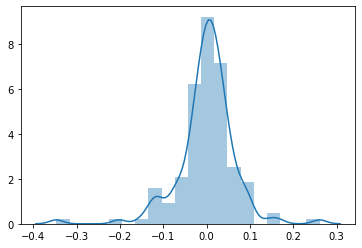

In [48]:
res = y_train_pred - y_train
sns.distplot(res,bins =20)

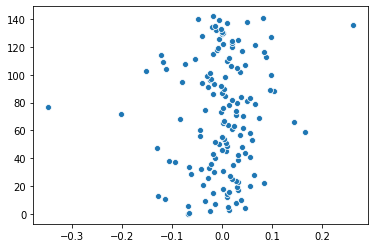

In [49]:
k = [i for i in range(143)]
sns.scatterplot(res,k)

The residuals comply to our assumptions ie . normal distribution and no patterns can be recongnized .

###Testing the model

In [50]:
X_test_rfe = df_test[['carwidth',   'horsepower', 'enginelocation_rear',
       'Car_Company_audi', 'Car_Company_chevrolet', 'Car_Company_dodge',
       'Car_Company_honda', 'Car_Company_isuzu', 'Car_Company_mazda',
       'Car_Company_mercury', 'Car_Company_mitsubishi', 'Car_Company_nissan',
       'Car_Company_peugeot', 'Car_Company_plymouth', 'Car_Company_renault',
       'Car_Company_saab', 'Car_Company_subaru', 'Car_Company_toyota',
       'Car_Company_volkswagen', 'Car_Company_volvo']]
    
X_test_sm_rfe = sm.add_constant(X_test_rfe)

y_test_pred_rfe = lr_rfe.predict(X_test_sm_rfe)



In [51]:
y_test = df_test.price
r2_score(y_true= df_test.price , y_pred= y_test_pred_rfe )


0.9088823563399877

Text(0, 0.5, 'y_pred')

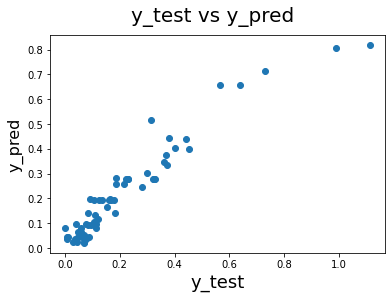

In [52]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred_rfe)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

###Finalizing the model for production.

In [53]:
import joblib
joblib.dump(lr_rfe , 'lr_rfe.pkl')

['lr_rfe.pkl']

###Interpreting the model -Drawing inferences

In [54]:
print(lr_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     62.52
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           2.18e-54
Time:                        09:43:07   Log-Likelihood:                 186.60
No. Observations:                 143   AIC:                            -331.2
Df Residuals:                     122   BIC:                            -269.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

As per the model , the most impportant features that influence the price are -

    Car Width
    Horse Power
    Engine Location
    Car Company

Elaborating the above -

1. Car Width - As the car width increases , the price of car is higher if all other features remains constant.

2. Horse Power -As the Horse Power increases ,   the price of car is higher if all other features remains constant.

3. Engine Location - Rear engines influences the price positively.    The cars with rear engines have higher price     (if all other features are constant).

4. Car Company -All the car companies tend to give have a negetive influence on the price , **this doesn't make any business sense**.





###Rebuild the model 

As mentioned above, All the car companies tend to give have a negetive influence on the price , this doesn't make any business sense , Lets get rid of car comapnies and try again .We can manually add the car companies later if need be.

##HYBRID Model using automated feature selection and our knowledge from manual modelling 

From automated model building we recognized that car companies can influence RFE strongly .Lets get rid of car comapnies and try again .We can manually add the car companies later if need be.

In [55]:
X_train_2 = X_train.iloc[:,0:-21]

###Running RFE To Understand the main features

In [56]:
lm = LinearRegression()
lm.fit(X_train_2, y_train)
rfe = RFE(lm,15)            
rfe = rfe.fit(X_train_2, y_train)

In [57]:
list(zip(X_train_2.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 16),
 ('carlength', False, 4),
 ('carwidth', True, 1),
 ('carheight', False, 20),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 21),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 17),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', True, 1),
 ('aspiration_turbo', False, 9),
 ('drivewheel_rwd', False, 18),
 ('fueltype_gas', True, 1),
 ('carbody_hardtop', False, 7),
 ('carbody_hatchback', False, 10),
 ('carbody_sedan', False, 11),
 ('carbody_wagon', False, 8),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 2),
 ('cylindernumber_three', False, 13),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 24),
 ('enginelocation_rear', True, 1),
 ('doornumber_two', False, 19),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 14),
 ('enginetype_ohc', False, 5),
 ('enginetype_ohcf', False, 15),
 ('enginetype_ohcv', True, 1),
 (

In [58]:
col = X_train_2.columns[rfe.support_]
X_train_rfe = X_train_2[col]
col

Index(['carwidth', 'curbweight', 'enginesize', 'stroke', 'compressionratio',
       'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_twelve',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_ohcv'],
      dtype='object')

###Training the Model

In [59]:
X_train_sm_rfe = sm.add_constant(X_train_rfe)
lr_rfe = sm.OLS(y_train ,X_train_sm_rfe).fit()
print(lr_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     69.23
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.43e-53
Time:                        09:43:07   Log-Likelihood:                 172.04
No. Observations:                 143   AIC:                            -312.1
Df Residuals:                     127   BIC:                            -264.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

Getting rid of features with high p value

In [60]:
X_train_rfe = X_train[['carwidth', 'curbweight', 'enginesize', 'stroke', 
       'peakrpm',     
        'cylindernumber_four',  
       'enginelocation_rear',   'enginetype_ohcv']]
X_train_sm_rfe = sm.add_constant(X_train_rfe)
lr_rfe = sm.OLS(y_train ,X_train_sm_rfe).fit()
print(lr_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     121.8
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.24e-57
Time:                        09:43:07   Log-Likelihood:                 164.61
No. Observations:                 143   AIC:                            -311.2
Df Residuals:                     134   BIC:                            -284.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0361    

###Checking the VIF

In [61]:
             # Create a dataframe that will contain the names of all the feature variables and their respective VIFs 
vif = pd.DataFrame()
vif['Features'] = X_train_sm_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm_rfe.values, i) for i in range(X_train_sm_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.56
2,curbweight,7.01
3,enginesize,5.76
1,carwidth,3.83
6,cylindernumber_four,1.82
7,enginelocation_rear,1.57
8,enginetype_ohcv,1.57
5,peakrpm,1.21
4,stroke,1.16


Excluding curb weight due to higher vif and rechecking VIF<br>
From our first model , we know that Car company BMW has had positive impact on Price and explains the variability better , Lets add company VMW to the mix and see if there are any improvements. 

**Please note that this can be based on what the business needs , if the busienss needs only the features of the cars that influence the price we can exclude car company completely.I'm including the feature car_company_bmw here as the feature explains the variabiltiy better and has good significance.** 

In [62]:
X_train_rfe = X_train[['carwidth',   'enginesize', 'stroke', 'peakrpm',
       'cylindernumber_four', 'enginelocation_rear', 'enginetype_ohcv','Car_Company_bmw']]
X_train_sm_rfe = sm.add_constant(X_train_rfe)
lr_Final = sm.OLS(y_train ,X_train_sm_rfe).fit()
print(lr_Final.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     153.8
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.21e-63
Time:                        09:43:07   Log-Likelihood:                 179.46
No. Observations:                 143   AIC:                            -340.9
Df Residuals:                     134   BIC:                            -314.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0890    

In [63]:
             # Create a dataframe that will contain the names of all the feature variables and their respective VIFs 
vif = pd.DataFrame()
vif['Features'] = X_train_sm_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm_rfe.values, i) for i in range(X_train_sm_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.06
2,enginesize,4.08
1,carwidth,2.56
5,cylindernumber_four,1.92
7,enginetype_ohcv,1.72
6,enginelocation_rear,1.70
8,Car_Company_bmw,1.30
3,stroke,1.22
4,peakrpm,1.22


The features of the model have low VIF (<5) & The model has a good adjusted R2 score ~90% ,which means the model can explain good amount of variance in the data .Most of the features also have low P value , an indicator for good significance.

###Residual analysis

In [64]:
y_train_pred = lr_Final.predict(X_train_sm_rfe)

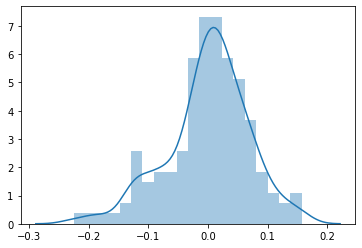

In [65]:
res = y_train_pred - y_train
sns.distplot(res,bins =20)

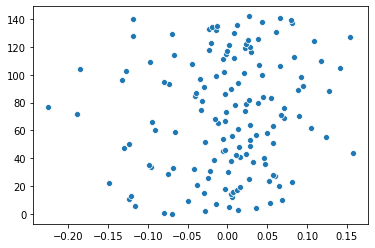

In [66]:
k = [i for i in range(143)]
sns.scatterplot(res,k)

The residuals comply to our assumptions ie . normal distribution and no patterns can be recongnized .

###Testing the model

In [67]:
X_test_rfe = df_test[['carwidth',   'enginesize', 'stroke', 'peakrpm',
       'cylindernumber_four', 'enginelocation_rear', 'enginetype_ohcv','Car_Company_bmw']]
    
X_test_sm_rfe = sm.add_constant(X_test_rfe)

y_test_pred_rfe = lr_Final.predict(X_test_sm_rfe)



In [68]:
y_test = df_test.price
r2_score(y_true= df_test.price , y_pred= y_test_pred_rfe )


0.9030616147923433

Text(0, 0.5, 'y_pred')

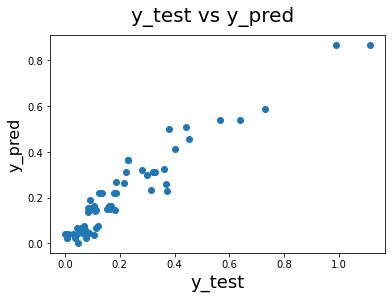

In [69]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred_rfe)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

###Finalizing the model for production.

In [70]:
import joblib
joblib.dump(lr_Final , 'lr_Final.pkl')

['lr_Final.pkl']

###Interpreting the model -Drawing inferences

In [71]:
print(lr_Final.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     153.8
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.21e-63
Time:                        09:43:08   Log-Likelihood:                 179.46
No. Observations:                 143   AIC:                            -340.9
Df Residuals:                     134   BIC:                            -314.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0890    

### Final equation of the model :<br>
 *Price = 0.42 * carwidth + 0.72 * enginesize - 0.089 * stroke + 0.09 * peakrpm -0.074 * cylindernumr_four + 0.34 * enginelocation_rear - 0.081 * enginetype_ohcv + 0.2 * car_comany_bmw - 0.089*

As per the model  , the most impportant features that influence the price are  -
1. Car Width                 
2. Engine Size             
3. Stroke
4. Peak RPM
5. Cylinder Number
6. Engine Location
7. Engine type 
8. Car Company bmw 


Top 3 features that can expalin the price are : 
1. Engine Size (0.72)
2. Carwidth (0.42)
3. Engine Location (0.34)

Elaborating the above - 

1. Car Width    - As the car width  increases , the price of car is higher if all other features remains constant. 

2. Engine Size  -As the Engine Size increases , the price of car is higher if all other features remains constant. This has the most influence on price(0.72)

3. Stroke : Stroke tends to negetively influence the price if all the other features remains constant.

4. Peak RPM : Increase in Peak RPM can fetch better prices if all other feature remains constant .It doesnt drastically influence the price , but it does nonetheless.

5. Cylinder Numbers - Cars With 4 cylinders are priced lower .(if all other features remains constant)

6. Engine Location - Rear engines influences the price  positively.The cars with rear engines have higher  price (if all  other features are constant).

7. Engine Type - OHCV engines negetively influence the price if all the other feature remains consttant.

8. Car Company  - Cars from BMW usually have positive effect on Price .Geely can consider studying case studies from BMW to understand this.




##CONCLUSION


The model built using RFE (lr_FINAL) gives a good adjusted R2 squared/R2 squared value on both Testing and training data indicating a good model. 

**I would prefer this model(lr_FINAL) over the earlier models(lr_reg & lr_rfe) Owing to** <br>
  **1. higher adjusted R2 sqaured values** <br>
  **2. The features can also be explained easily to business(GEELY)**


